## Exploration des données - dataset sba-national

In [1]:
# import des librairies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# afficher les résultats en entier
pd.set_option('display.max_row',30)
pd.set_option('display.max_column', 55)

In [3]:
# Chargement du dataset
df = pd.read_csv('sba_national_clean.csv')

### Analyse de forme

In [4]:
# identification du nombre de lignes et de variables
df.shape

(897167, 28)

In [5]:
# Identifier les variables et leurs types
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr              int64
LowDoc                 int64
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status             int64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
crysis_year           object
dtype: object

int64      15
object      8
float64     5
Name: count, dtype: int64


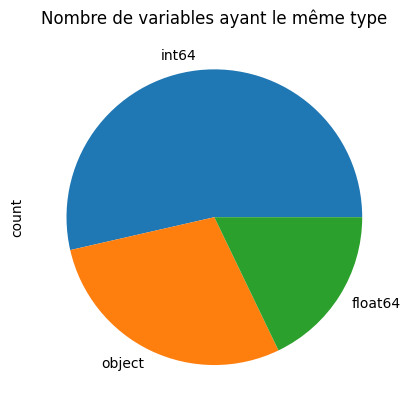

In [ ]:
# identification le nombre de variables ayant le même type
print(df.dtypes.value_counts())

df.dtypes.value_counts().plot.pie()
plt.title('Répartition du type des variables')
plt.legend()
plt.show()

<Axes: >

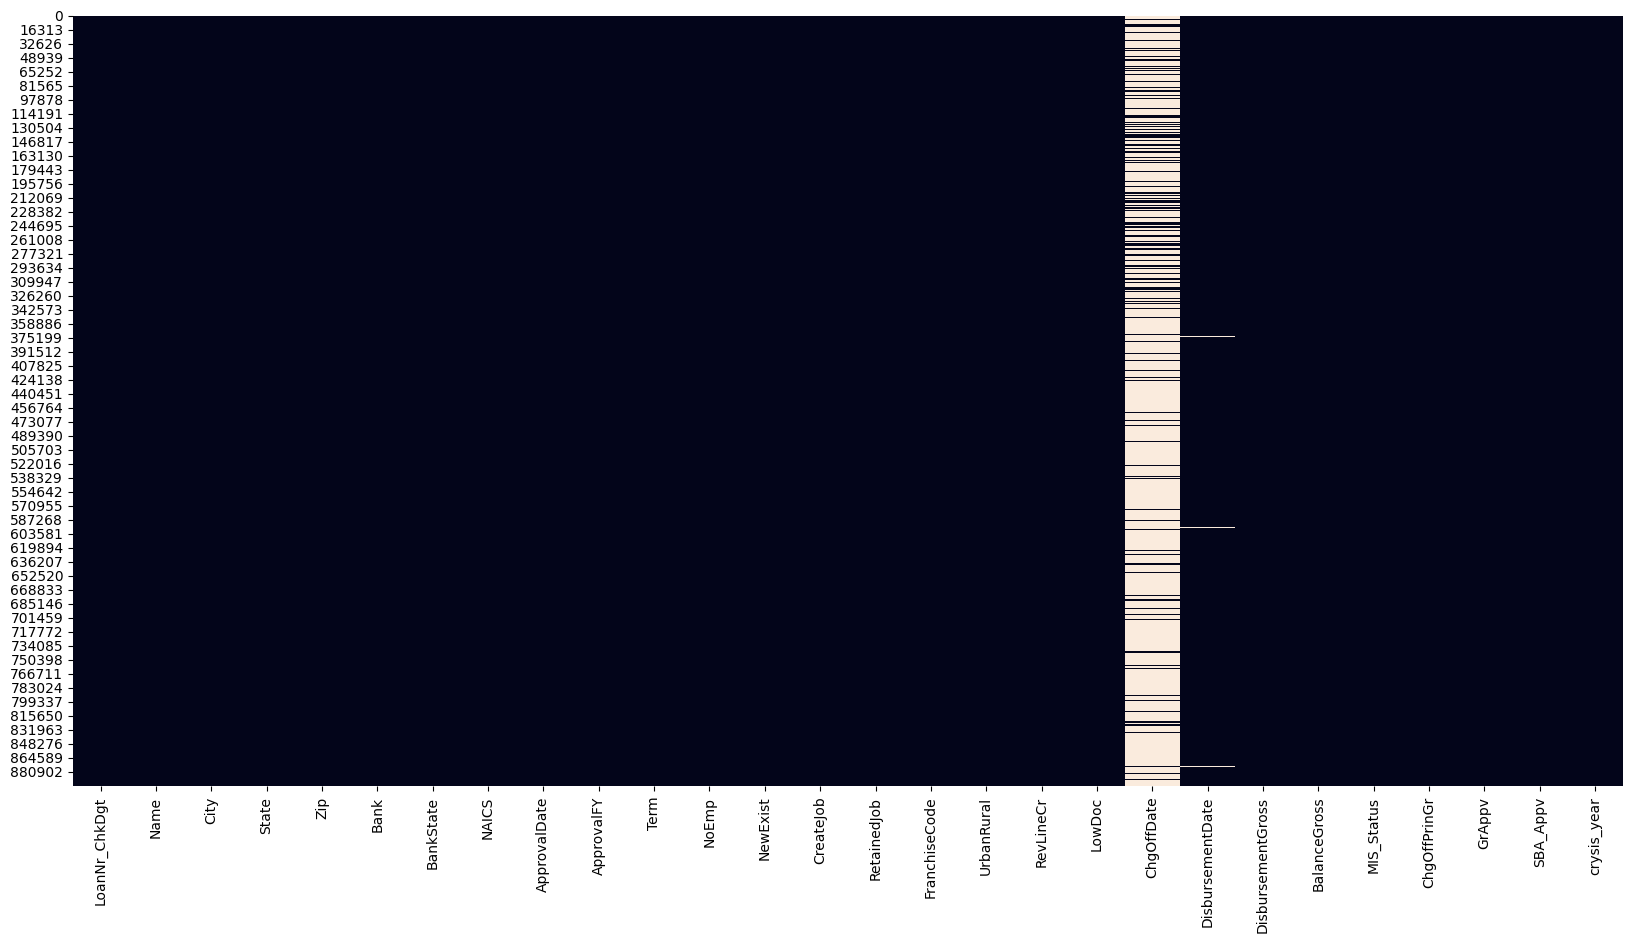

In [7]:
# détection des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [8]:
# Estimation des valeurs manquantes par variable et tri en fonction
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

ChgOffDate           0.818943
DisbursementDate     0.002424
LoanNr_ChkDgt        0.000000
Name                 0.000000
Zip                  0.000000
Bank                 0.000000
BankState            0.000000
NAICS                0.000000
ApprovalDate         0.000000
ApprovalFY           0.000000
City                 0.000000
State                0.000000
NoEmp                0.000000
Term                 0.000000
RetainedJob          0.000000
NewExist             0.000000
FranchiseCode        0.000000
UrbanRural           0.000000
RevLineCr            0.000000
CreateJob            0.000000
LowDoc               0.000000
DisbursementGross    0.000000
BalanceGross         0.000000
MIS_Status           0.000000
ChgOffPrinGr         0.000000
GrAppv               0.000000
SBA_Appv             0.000000
crysis_year          0.000000
dtype: float64

In [9]:
# Suppression des variables ayant un pourcentage de valeurs manquantes supérieur à 80% (ou supprimer la variable 'ChgOffDate', ex : df.drop('ChgOffDate', axis=1))
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.8]]

In [10]:
df.shape

(897167, 27)

#### Conclusion de l'analyse de forme
- variable target : MIS_Status
- lignes et colonnes : (897167, 27)
- types de variables : 17 variables quantitatives et 10 variables qualitatives
- analyse des valeurs manquantes : 1 variable avec plus de 80% de valeurs manquantes (ChgOffDate) donc suppression car inexploitable pour l'analyse

### Analyse de fond

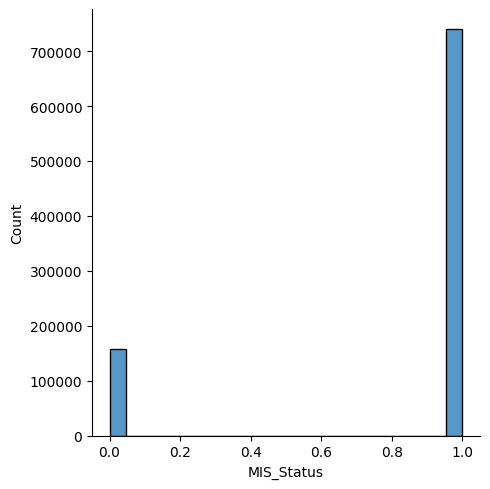

In [11]:
# Distribution du nombre de personnes ayant rembourser leur prêt bancaire
sns.displot(df, x='MIS_Status')

In [12]:
# examen de la variable target
df['MIS_Status'].value_counts()

# classe non équilibrée, donc penser à utiliser les métriques 'score-z1', 'sensibilité' ou 'précision'

MIS_Status
1    739609
0    157558
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

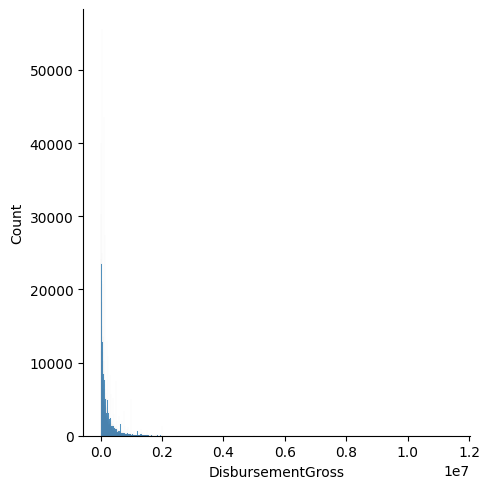

<Figure size 640x480 with 0 Axes>

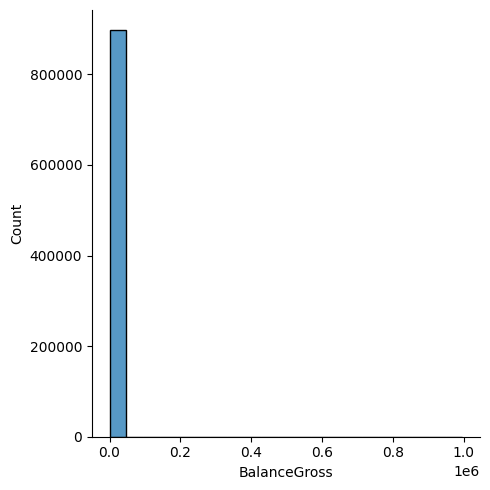

<Figure size 640x480 with 0 Axes>

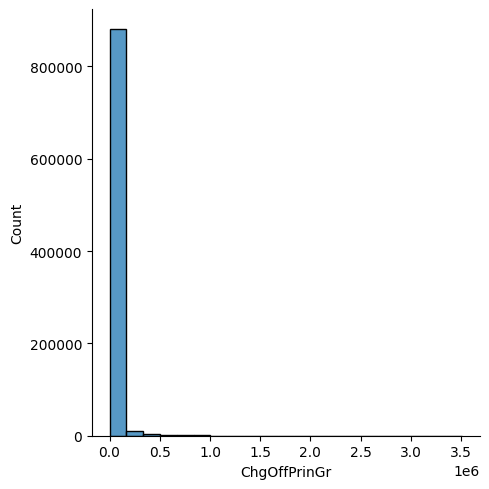

<Figure size 640x480 with 0 Axes>

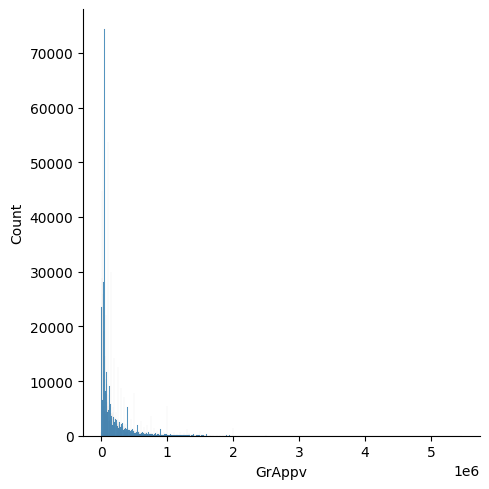

<Figure size 640x480 with 0 Axes>

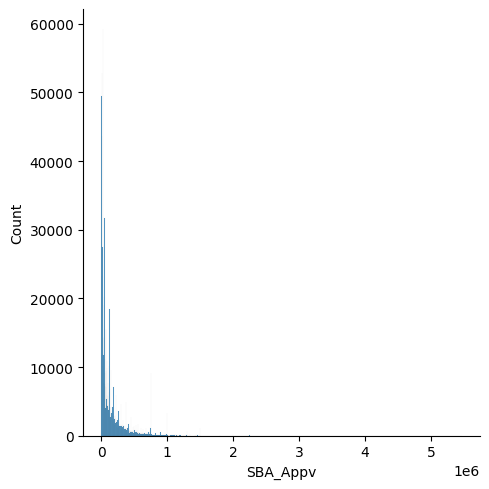

In [13]:
# Histogrammes des variables continues (analyse)
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])
plt.show()

In [14]:
# Analyse des variables qualitatives (object)

# Mapping des valeurs uniques
for col in df.select_dtypes('object'):
    print(f"{col :-<50} {df[col].unique()}")

Name---------------------------------------------- ['ABC HOBBYCRAFT' 'LANDMARK BAR & GRILLE (THE)' 'WHITLOCK DDS, TODD M.'
 ... 'RADCO MANUFACTURING CO.,INC.' 'MARUTAMA HAWAII, INC.'
 'PACIFIC TRADEWINDS FAN & LIGHT']
City---------------------------------------------- ['EVANSVILLE' 'NEW PARIS' 'BLOOMINGTON' ... 'MURFRECSBORO' 'E WENALCHEE'
 'SO. OZONE PARK']
State--------------------------------------------- ['IN' 'OK' 'FL' 'CT' 'NJ' 'NC' 'IL' 'RI' 'TX' 'VA' 'TN' 'AR' 'MN' 'MO'
 'MA' 'CA' 'SC' 'LA' 'IA' 'OH' 'KY' 'MS' 'NY' 'MD' 'PA' 'OR' 'ME' 'KS'
 'MI' 'AK' 'WA' 'CO' 'MT' 'WY' 'UT' 'NH' 'WV' 'ID' 'AZ' 'NV' 'WI' 'NM'
 'GA' 'ND' 'VT' 'AL' 'NE' 'SD' 'HI' 'DE' 'DC' 'unknown']
Bank---------------------------------------------- ['FIFTH THIRD BANK' '1ST SOURCE BANK' 'GRANT COUNTY STATE BANK' ...
 'FIRST ILLINOIS BANK' 'COLORADO COMMUNITY FIRST STATE' 'DEPCO']
BankState----------------------------------------- ['OH' 'IN' 'OK' 'FL' 'DE' 'SD' 'AL' 'CT' 'GA' 'OR' 'MN' 'RI' 'NC' 'TX'
 'MD' 'NY' '

In [15]:
# visualiser la relation entre variables et target

In [16]:
df.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,crysis_year
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997,1997,84,4,2,0,0,0,0,1,2,28-Feb-99,60000.0,0.0,1,0.0,60000.0,48000.0,no
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,1997,1997,60,2,2,0,0,0,0,1,2,31-May-97,40000.0,0.0,1,0.0,40000.0,32000.0,no
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997,1997,180,7,1,0,0,0,0,1,1,31-Dec-97,287000.0,0.0,1,0.0,287000.0,215250.0,no
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,1997,60,2,1,0,0,0,0,1,2,30-Jun-97,35000.0,0.0,1,0.0,35000.0,28000.0,no
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997,1997,240,14,1,7,7,0,0,1,1,14-May-97,229000.0,0.0,1,0.0,229000.0,229000.0,no


In [17]:
# filtrage en fonction de la target
df_pif = df[df['MIS_Status'] == 'P I F']
df_chgoff = df[df['MIS_Status'] == 'CHGOFF']

In [18]:
print(len(df))
print(len(df_pif))
print(len(df_chgoff))

897167
0
0


#### Target / variables

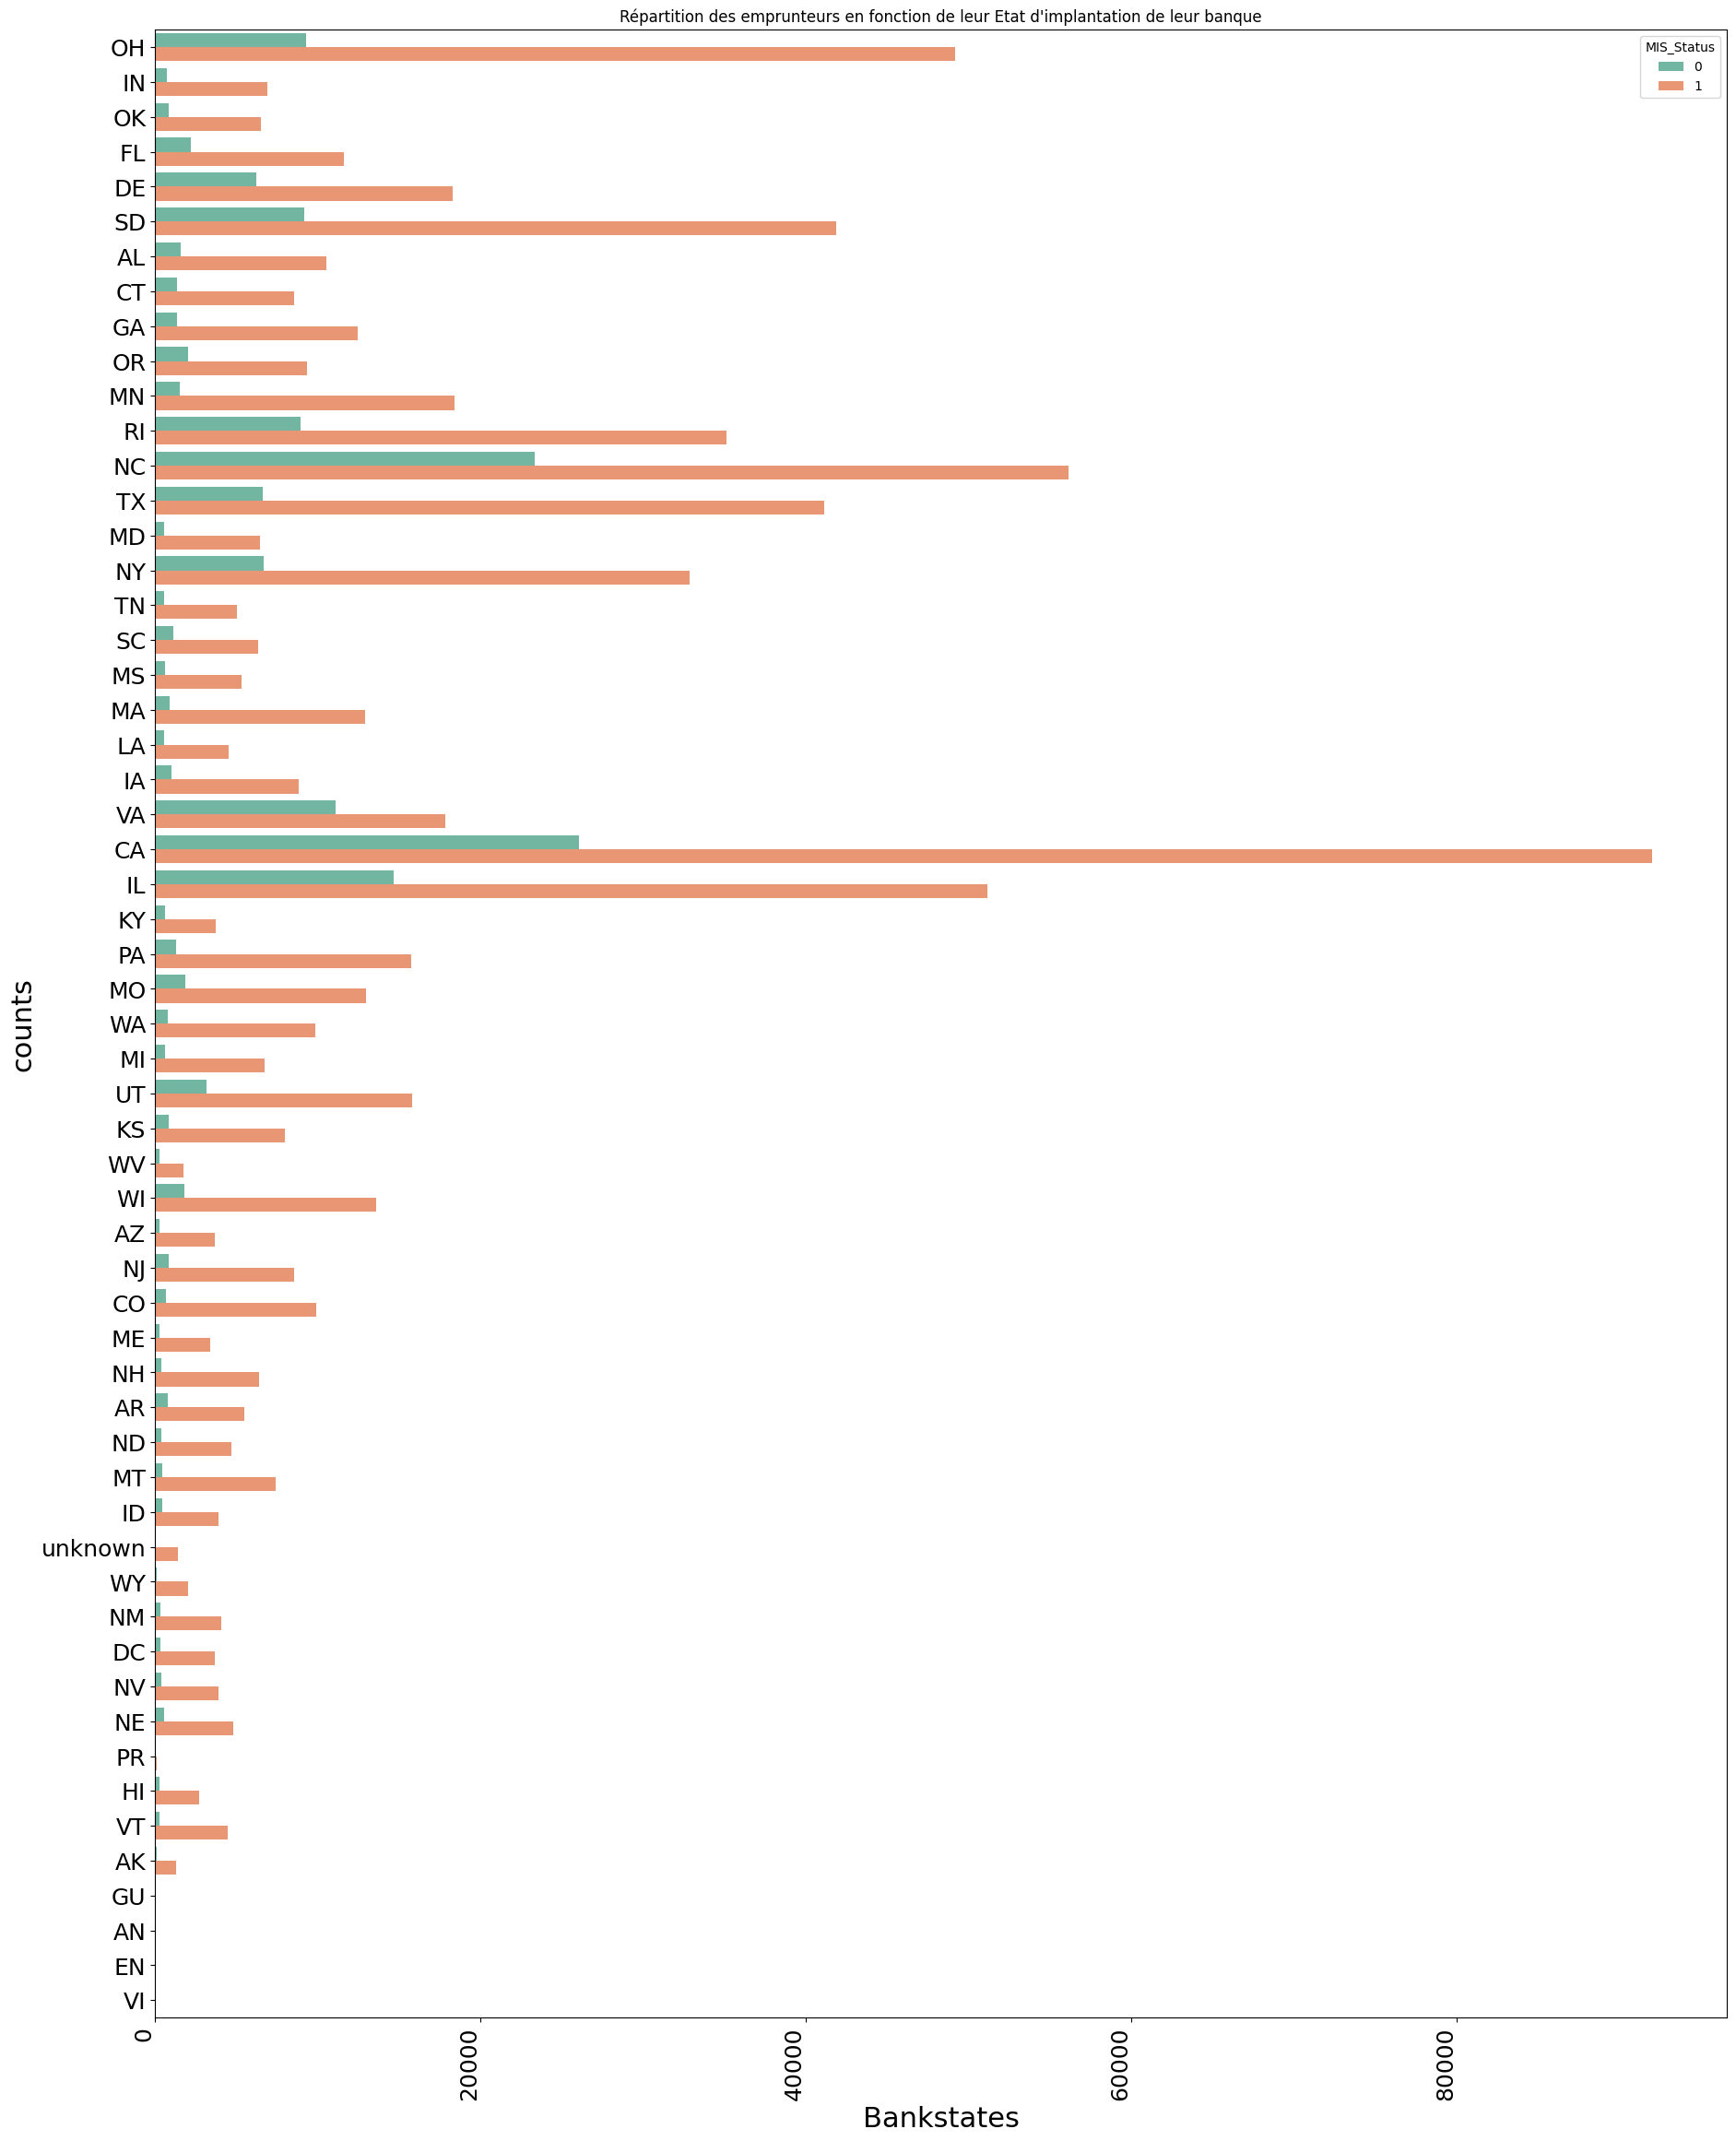

In [19]:
plt.figure(figsize=(22,28))
sns.countplot(data=df, y='BankState', hue="MIS_Status", width=0.8, palette='Set2')
plt.xticks(rotation = 90, ha = 'right', fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("Bankstates", fontsize = 22)
plt.ylabel("counts", fontsize = 22)
plt.title("Répartition des emprunteurs en fonction de leur Etat d'implantation de leur banque")

plt.show()

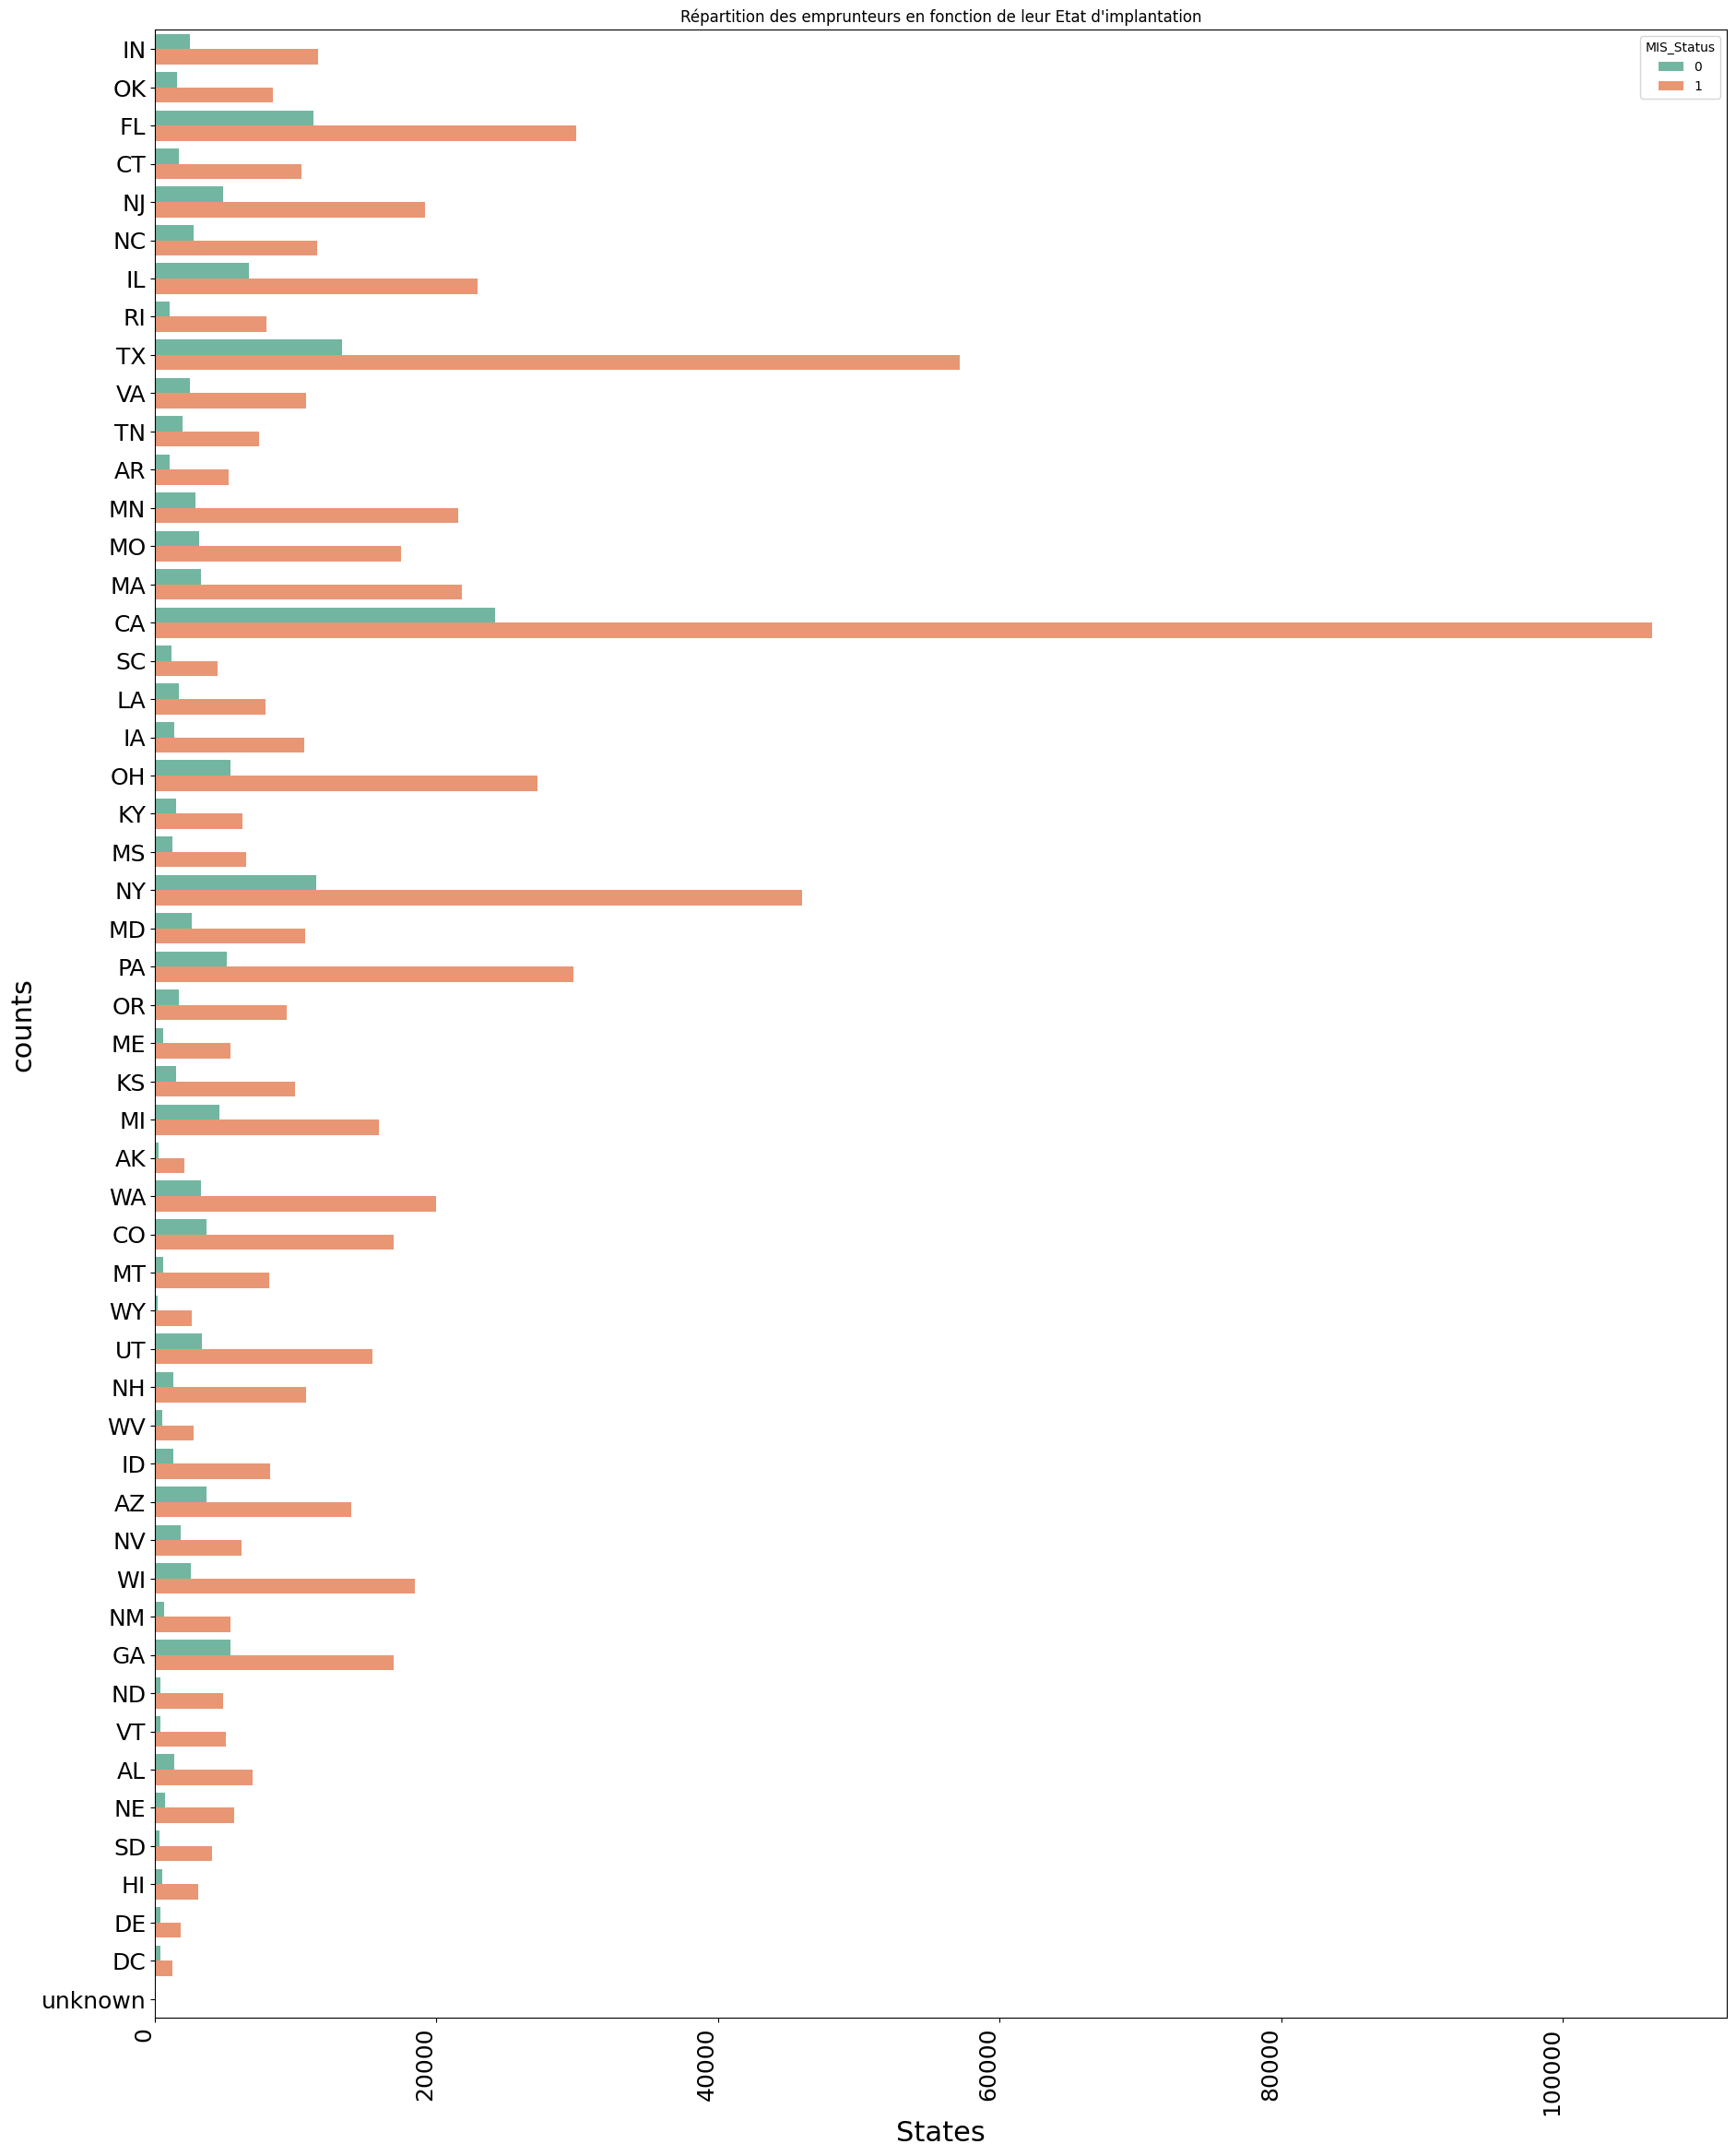

In [20]:
plt.figure(figsize=(22,28))
sns.countplot(data=df, y='State', hue="MIS_Status", width=0.8, palette='Set2')
plt.xticks(rotation = 90, ha = 'right', fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("States", fontsize = 22)
plt.ylabel("counts", fontsize = 22)
plt.title("Répartition des emprunteurs en fonction de leur Etat d'implantation")

plt.show()

In [21]:
df.sample(1)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,crysis_year
887774,9799033009,EAST CENTRAL IOWA INTERMODAL,WEST LIBERTY,IA,52776,CENTRAL STATE BANK,IA,0,1996,1997,184,4,2,0,0,0,0,1,1,31-Jan-97,650000.0,0.0,1,0.0,650000.0,390000.0,no


In [22]:
print(df['NAICS'].unique())
print(df['NAICS'].info())

[45 72 62  0 33 81 23 44 42 61 53 54 31 51 71 52 21 32 56 48 11 92 22 49
 55]
<class 'pandas.core.series.Series'>
RangeIndex: 897167 entries, 0 to 897166
Series name: NAICS
Non-Null Count   Dtype
--------------   -----
897167 non-null  int64
dtypes: int64(1)
memory usage: 6.8 MB
None


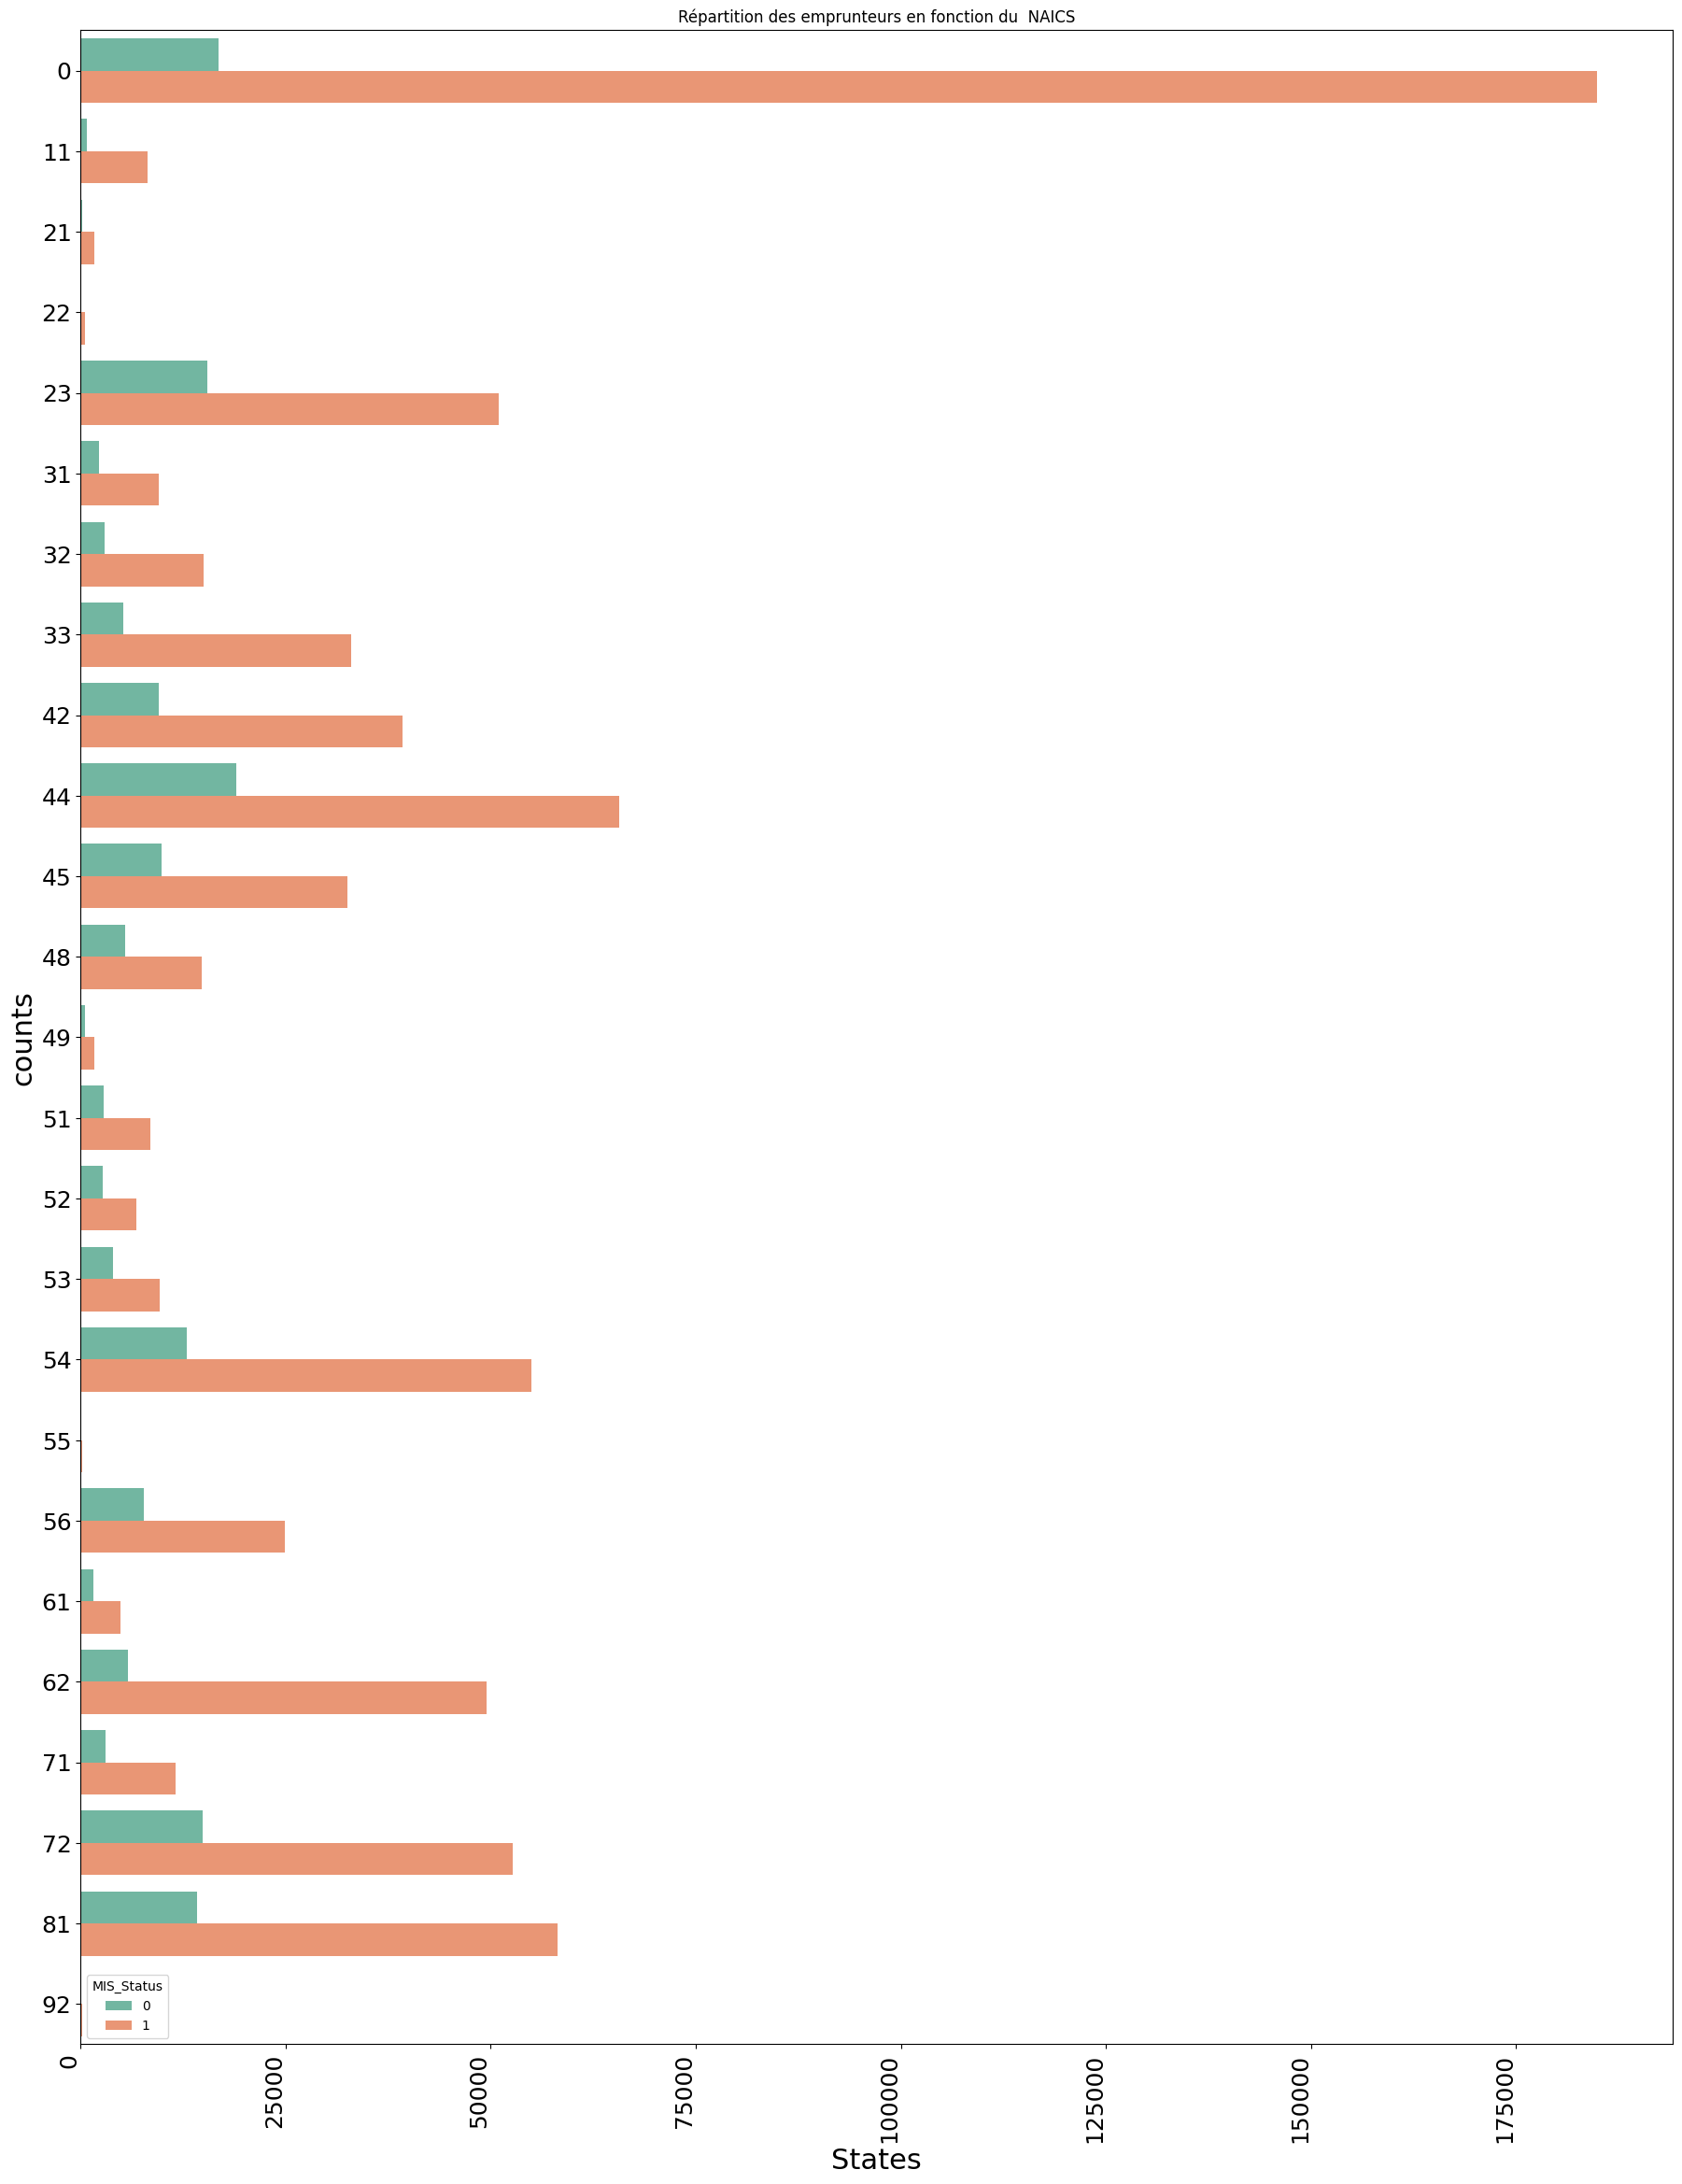

In [23]:
plt.figure(figsize=(22,28))
sns.countplot(data=df, y='NAICS', hue="MIS_Status", width=0.8, palette='Set2')
plt.xticks(rotation = 90, ha = 'right', fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("States", fontsize = 22)
plt.ylabel("counts", fontsize = 22)
plt.title("Répartition des emprunteurs en fonction du  NAICS")

plt.show()

In [24]:
df.sample(1)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,crysis_year
726991,7581983010,STATE FARM INSURANCE,ALAMOSA,CO,81101,VECTRA BK COLORADO NATL ASSOC,NM,0,1994,1994,180,3,1,0,0,0,0,1,2,31-Oct-94,73000.0,0.0,1,0.0,73000.0,65700.0,no


In [25]:
# target / variables qualitatives
pd.crosstab(df['MIS_Status'], df['NAICS'])

NAICS,0,11,21,22,23,31,32,33,42,44,45,48,49,51,52,53,54,55,56,61,62,71,72,81,92
MIS_Status,,,,,,,,,,,,,,,,,,,,,,,,,
0,16799,812,157,94,15463,2293,2934,5211,9480,18938,9930,5431,508,2821,2692,3904,12957,26,7661,1552,5736,3013,14882,14229,35
1,184868,8183,1694,568,51029,9499,14971,32995,39193,65629,32478,14767,1702,8541,6778,9684,54965,230,24868,4849,49528,11603,52629,58166,192


In [26]:
pd.crosstab(df['MIS_Status'], df['State'])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,unknown
MIS_Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,281,1389,1064,3657,24160,3671,1703,387,394,11274,5337,550,1382,1338,6709,2482,1497,1497,1730,3257,2614,583,4612,2849,3152,1218,594,2755,402,726,1289,4829,658,1863,11451,5349,1544,1688,5089,1016,1145,349,1994,13265,3316,2487,404,3268,2560,530,199,1
1,2122,6971,5269,13967,106329,16927,10424,1226,1799,29919,16935,3057,10604,8158,22885,11597,9959,6223,7840,21835,10645,5354,15881,21510,17501,6450,8143,11531,4835,5655,10734,19181,5368,6159,45944,27149,8401,9353,29712,7932,4450,4079,7406,57140,15457,10720,5029,19987,18463,2755,2639,0


#### conclusion de l'analyse de fond 
- variable target : classe non équilibrée, 16% de la classe 'CHGOF'
- signification des variables : (voir excel)
- relation target / variables : 